### Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

Next, let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once.

    Note:
    You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5 Generate Random World Cities

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

# 6.2.6 Get the City Weather Data #

### Import Dependencies, and Initialize an Empty List and Counters ###

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=29364cbe7cc686003a1aabd7b3d8dbc4


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop Through the List of Cities and Build the City URL
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | las vegas
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | almeria
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | kudahuvadhoo
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | kantang
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | aykhal
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | riyadh
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | brae
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | ust-nera
Processing Record 21 of Set 1 | clyde river
Processing Record 22 of Set 1 | barentsburg
City not found. Skipping...
Proces

Processing Record 37 of Set 4 | svoronos
Processing Record 38 of Set 4 | amderma
City not found. Skipping...
Processing Record 39 of Set 4 | marks
Processing Record 40 of Set 4 | weligama
Processing Record 41 of Set 4 | ust-kuyga
Processing Record 42 of Set 4 | chuy
Processing Record 43 of Set 4 | palu
Processing Record 44 of Set 4 | adrar
Processing Record 45 of Set 4 | barrow
Processing Record 46 of Set 4 | rio gallegos
Processing Record 47 of Set 4 | gusinoye ozero
Processing Record 48 of Set 4 | coffs harbour
Processing Record 49 of Set 4 | maloshuyka
City not found. Skipping...
Processing Record 50 of Set 4 | touros
Processing Record 1 of Set 5 | viedma
Processing Record 2 of Set 5 | ahuimanu
Processing Record 3 of Set 5 | tuatapere
Processing Record 4 of Set 5 | kysyl-syr
Processing Record 5 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 6 of Set 5 | kruisfontein
Processing Record 7 of Set 5 | dakar
Processing Record 8 of Set 5 | yellowknife
Processing Record 9

Processing Record 24 of Set 8 | rumuruti
Processing Record 25 of Set 8 | kuche
City not found. Skipping...
Processing Record 26 of Set 8 | faya
Processing Record 27 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 28 of Set 8 | turka
Processing Record 29 of Set 8 | hargeysa
Processing Record 30 of Set 8 | chokurdakh
Processing Record 31 of Set 8 | bozoum
Processing Record 32 of Set 8 | roebourne
Processing Record 33 of Set 8 | lolua
City not found. Skipping...
Processing Record 34 of Set 8 | phrai bung
City not found. Skipping...
Processing Record 35 of Set 8 | nalut
Processing Record 36 of Set 8 | marsassoum
Processing Record 37 of Set 8 | santa rita
Processing Record 38 of Set 8 | christchurch
Processing Record 39 of Set 8 | severo-yeniseyskiy
Processing Record 40 of Set 8 | toliary
City not found. Skipping...
Processing Record 41 of Set 8 | zhigalovo
Processing Record 42 of Set 8 | noyabrsk
Processing Record 43 of Set 8 | high level
Processing Record 44 o

Processing Record 11 of Set 12 | ano mera
Processing Record 12 of Set 12 | gweta
Processing Record 13 of Set 12 | palasa
Processing Record 14 of Set 12 | zhanaozen
Processing Record 15 of Set 12 | beloha
Processing Record 16 of Set 12 | labuhan
Processing Record 17 of Set 12 | bojnurd
Processing Record 18 of Set 12 | sao filipe
Processing Record 19 of Set 12 | kabare
Processing Record 20 of Set 12 | kovernino
Processing Record 21 of Set 12 | llanes
Processing Record 22 of Set 12 | dingzhou
Processing Record 23 of Set 12 | lingyuan
Processing Record 24 of Set 12 | haibowan
City not found. Skipping...
Processing Record 25 of Set 12 | lashio
Processing Record 26 of Set 12 | bima
Processing Record 27 of Set 12 | cody
Processing Record 28 of Set 12 | licheng
Processing Record 29 of Set 12 | alofi
Processing Record 30 of Set 12 | constitucion
Processing Record 31 of Set 12 | half moon bay
Processing Record 32 of Set 12 | port blair
Processing Record 33 of Set 12 | krasnozerskoye
Processing R

### Handle API Request Errors with try-except Blocks

In [10]:
len(city_data)

563

# 6.2.7 Create a DataFrame of City Weather Data #

Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,52.70,54,20,7.90,NZ,2021-10-30 13:30:29
1,Las Vegas,36.1750,-115.1372,63.68,46,1,4.61,US,2021-10-30 13:26:35
2,Arraial Do Cabo,-22.9661,-42.0278,71.46,83,90,16.11,BR,2021-10-30 13:30:30
3,Almeria,37.1667,-2.3333,70.30,48,100,4.79,ES,2021-10-30 13:30:30
4,Codrington,-38.2667,141.9667,43.83,90,0,6.31,AU,2021-10-30 13:30:31
5,Kudahuvadhoo,2.6708,72.8944,82.92,75,21,12.84,MV,2021-10-30 13:30:31
6,Torbay,47.6666,-52.7314,48.76,70,20,11.50,CA,2021-10-30 13:30:32
7,Kantang,7.4054,99.5156,77.09,100,40,4.61,TH,2021-10-30 13:30:32
8,Punta Arenas,-53.1500,-70.9167,46.51,53,0,19.57,CL,2021-10-30 13:30:33
9,Rikitea,-23.1203,-134.9692,74.84,82,99,20.54,PF,2021-10-30 13:30:33


In [12]:
# Reordet columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity",
                   "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-10-30 13:30:29,-46.1927,168.8643,52.70,54,20,7.90
1,Las Vegas,US,2021-10-30 13:26:35,36.1750,-115.1372,63.68,46,1,4.61
2,Arraial Do Cabo,BR,2021-10-30 13:30:30,-22.9661,-42.0278,71.46,83,90,16.11
3,Almeria,ES,2021-10-30 13:30:30,37.1667,-2.3333,70.30,48,100,4.79
4,Codrington,AU,2021-10-30 13:30:31,-38.2667,141.9667,43.83,90,0,6.31
...,...,...,...,...,...,...,...,...,...
558,Turtas,RU,2021-10-30 13:34:47,58.9417,69.1325,24.33,94,100,7.23
559,Slavyanka,RU,2021-10-30 13:34:48,42.8633,131.3847,51.04,78,96,4.36
560,La Colorada,PA,2021-10-30 13:34:48,8.0167,-80.9833,79.09,84,66,6.89
561,Benjamin Constant,BR,2021-10-30 13:34:49,-4.3831,-70.0311,77.05,88,40,2.30


Lastly, following the instructions below, we'll create an output file to save the DataFrame as a CSV in a new folder for that file.

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Modify the .gitignore File ###

However, every time we want to add a new file or update current files to the repository, we have to add each file individually, which is time-consuming and cumbersome. Instead, we can add the files we don't want to track to the .gitignore file.

# 6.3.1. Plot Latitude vs. Temperature #

Recall that to create a scatter plot, we collect then add x- and y-axis data to plt.scatter().

### Get Data for Plotting


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

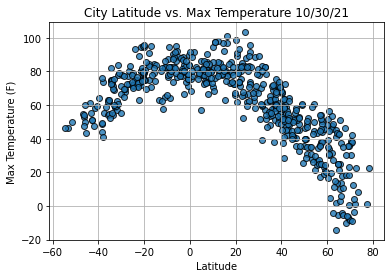

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

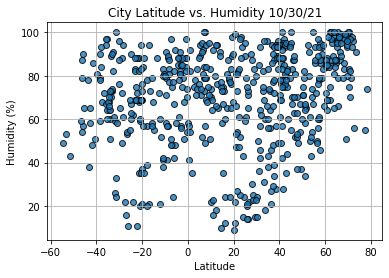

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

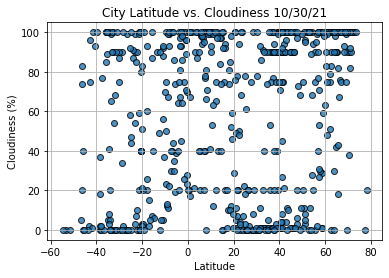

In [17]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

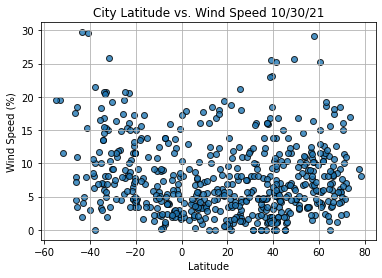

In [18]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# 6.4.1 Use Linear Regression to Find the Relationship Between Variables #

Independent variable: the variable changed by the analyst to observe how it affects the dependent variable 

Dependent variable: the variable tested by the analyst to observe how it is affected by the independent variable

    Note:
    To determine how strong the relationship is between the fitted line and the data, we find the correlation coefficient, or r-value. A correlation coefficient close to 1 shows a strong positive correlation, whereas close to –1 shows a strong negative correlation. A correlation coefficient close to zero is no correlation.

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

### Create a Linear Regression Function

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Create the Hemisphere DataFrames ###

    Note:
    To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].

In [21]:
index13 = city_data_df.loc[13]
index13

City                       Aykhal
Country                        RU
Date          2021-10-30 13:30:35
Lat                          66.0
Lng                         111.5
Max Temp                    13.57
Humidity                       96
Cloudiness                    100
Wind Speed                   8.12
Name: 13, dtype: object

In [22]:
# We can also filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
558     True
559     True
560     True
561    False
562     True
Name: Lat, Length: 563, dtype: bool

If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Las Vegas,US,2021-10-30 13:26:35,36.1750,-115.1372,63.68,46,1,4.61
3,Almeria,ES,2021-10-30 13:30:30,37.1667,-2.3333,70.30,48,100,4.79
5,Kudahuvadhoo,MV,2021-10-30 13:30:31,2.6708,72.8944,82.92,75,21,12.84
6,Torbay,CA,2021-10-30 13:30:32,47.6666,-52.7314,48.76,70,20,11.50
7,Kantang,TH,2021-10-30 13:30:32,7.4054,99.5156,77.09,100,40,4.61
...,...,...,...,...,...,...,...,...,...
557,Bisert,RU,2021-10-30 13:34:47,56.8617,59.0523,35.89,97,100,11.45
558,Turtas,RU,2021-10-30 13:34:47,58.9417,69.1325,24.33,94,100,7.23
559,Slavyanka,RU,2021-10-30 13:34:48,42.8633,131.3847,51.04,78,96,4.36
560,La Colorada,PA,2021-10-30 13:34:48,8.0167,-80.9833,79.09,84,66,6.89


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere ###

Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame.

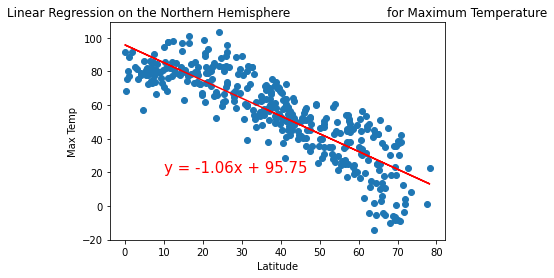

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere ###

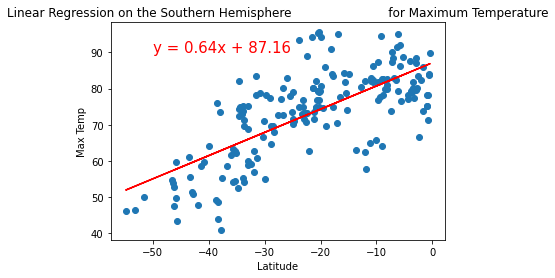

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity #

### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere


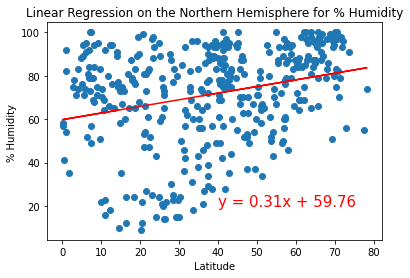

In [38]:
# Linear regression on the Percent Humidity for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity ',(40,20))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

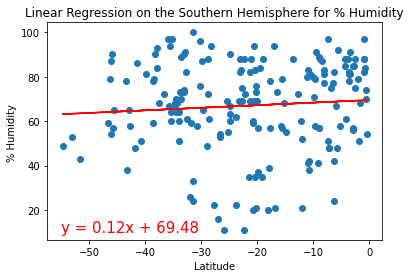

In [44]:
# Linear regression on the Percent Humidity for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity ',(-55,10))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness #

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere ###

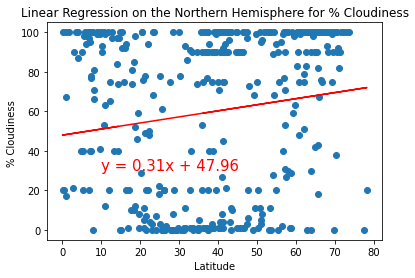

In [49]:
# Linear regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness ',(10,30))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

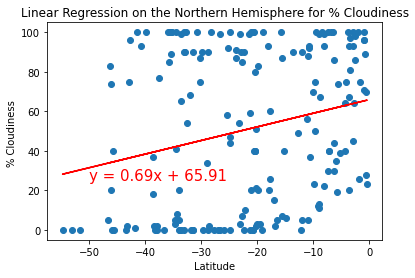

In [61]:
# Linear regression on the Percent Cloudiness for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness ',(-50,25))

# 6.4.5 Find the Correlation Between Latitude and Wind Speed #

### Perform Linear Regression on the Wind Speed for the Northern Hemisphere ###

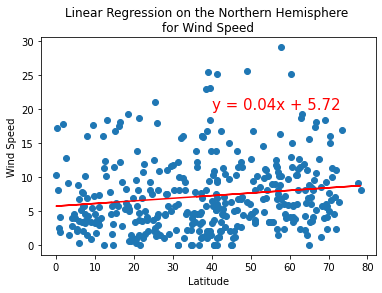

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,20))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

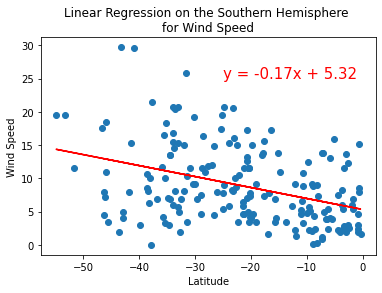

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-25,25))